<a href="https://colab.research.google.com/github/triandosimarmata/myprojects/blob/main/pycma_rosenbrock_and_sep_ellipsoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/CMA-ES/pycma.git

  Cloning https://github.com/CMA-ES/pycma.git to /tmp/pip-req-build-m7c6k5no
  Running command git clone --filter=blob:none --quiet https://github.com/CMA-ES/pycma.git /tmp/pip-req-build-m7c6k5no
  Resolved https://github.com/CMA-ES/pycma.git to commit 8d1650543a903e4c8c79b4b6788f454024806bd4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cma: filename=cma-4.4.0-py3-none-any.whl size=300937 sha256=4ed902329e20a3266c229fac87f4109dbe68d5f632717adfb606c9eaec21adbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-po5ljkdp/wheels/65/3c/a5/972860bf1352a2f7497e831aa02188d41e47ea2f620625c870
Successfully built cma


In [22]:
import cma
import numpy as np

# Define the Rosenbrock function manually
def rosenbrock_function(x):
  """The Rosenbrock function."""
  # This is the standard definition of the Rosenbrock function
  return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# --- Initial CMA-ES Settings ---
# 1. Problem dimension (e.g., we search for a solution in 8-dimensional space)
dimension = 100

# 2. Initial point (first guess)
# We start from the point [0.1, 0.1, ..., 0.1]
x0 = np.repeat(0.1, dimension)

# 3. Initial step size (standard deviation)
sigma0 = 0.5

# Initialize the CMA-ES evolution strategy
es = cma.CMAEvolutionStrategy(x0, sigma0)

# Run optimization using the simpler 'optimize' method
# This will automatically run the 'ask-tell' loop
print("Starting optimization for Rosenbrock function...")
es.optimize(rosenbrock_function)

# --- Display Results ---
print("\n--- Rosenbrock Optimization Results ---")
# es.result contains a tuple: (best_solution, best_fitness, ...)
best_solution = es.result[0]
best_fitness = es.result[1]

print(f"Dimension: {dimension}D")
# The actual optimal solution is [1, 1, ..., 1]
print(f"Optimal solution (x): \n{np.round(best_solution, 4)}")
# The actual minimum function value is 0
print(f"Optimal function value (f(x)): {best_fitness:.6e}")
print(f"Iterations needed: {es.result[3]}")

(8_w,17)-aCMA-ES (mu_w=5.1,w_1=31%) in dimension 100 (seed=837155, Thu Sep 25 07:44:46 2025)
Starting optimization for Rosenbrock function...
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     17 2.825441695606054e+03 1.0e+00 4.81e-01  5e-01  5e-01 0:00.0
    2     34 2.996896907615242e+03 1.0e+00 4.64e-01  5e-01  5e-01 0:00.0
    3     51 3.778487118432473e+03 1.0e+00 4.50e-01  4e-01  5e-01 0:00.1
  100   1700 2.186714611923814e+02 1.1e+00 7.81e-02  8e-02  8e-02 0:01.9
  200   3400 1.008587249795418e+02 1.2e+00 1.43e-02  1e-02  1e-02 0:03.7
  300   5100 9.700468746661493e+01 1.2e+00 2.57e-03  2e-03  3e-03 0:04.6
  400   6800 9.656817490559317e+01 2.0e+00 2.38e-03  2e-03  3e-03 0:05.0
  500   8500 9.581951061228193e+01 3.5e+00 3.21e-03  3e-03  7e-03 0:05.4
  600  10200 9.498126329916076e+01 4.5e+00 3.14e-03  3e-03  8e-03 0:05.9
  700  11900 9.410125450841274e+01 5.1e+00 3.06e-03  3e-03  8e-03 0:06.3
  800  13600 9.321958287689090e+01 5.6e+00 2.91e-03  3e-

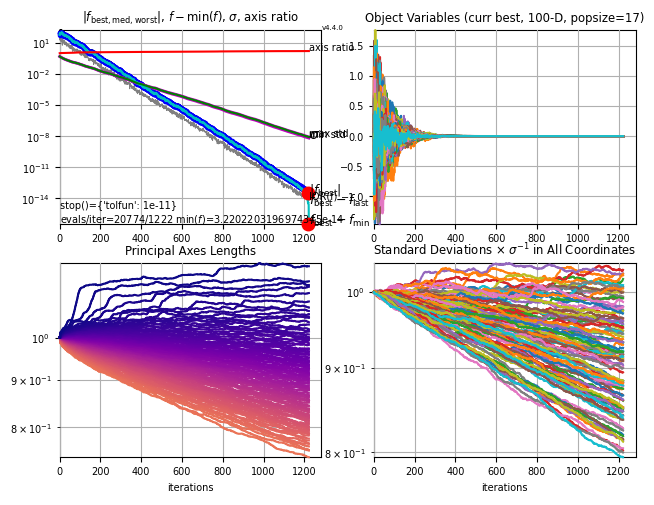

In [35]:
import cma
import os

# The optimization data is saved in the 'outcmaes' directory
output_directory = 'outcmaes'

# Check if the output directory exists
if os.path.exists(output_directory):
    # Use cma.plot() to visualize the optimization progress
    cma.plot()
else:
    print(f"Output directory '{output_directory}' not found. Please run the optimization code first.")

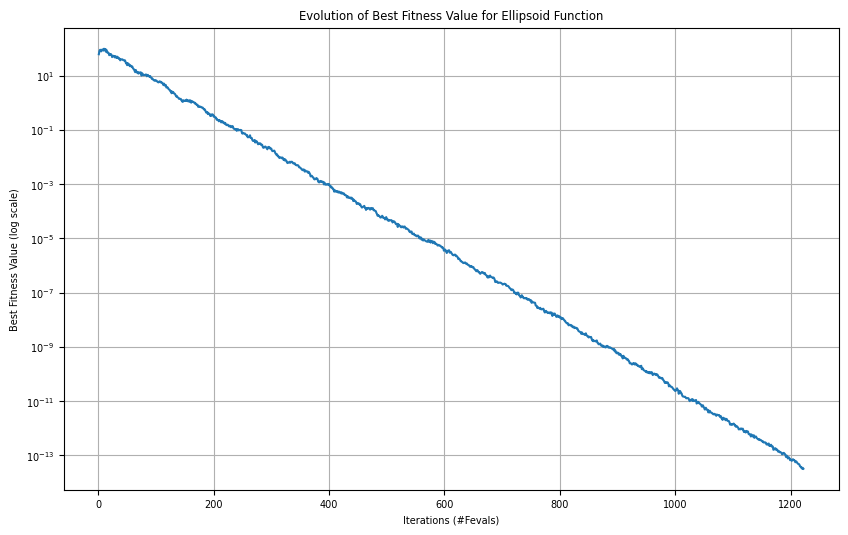

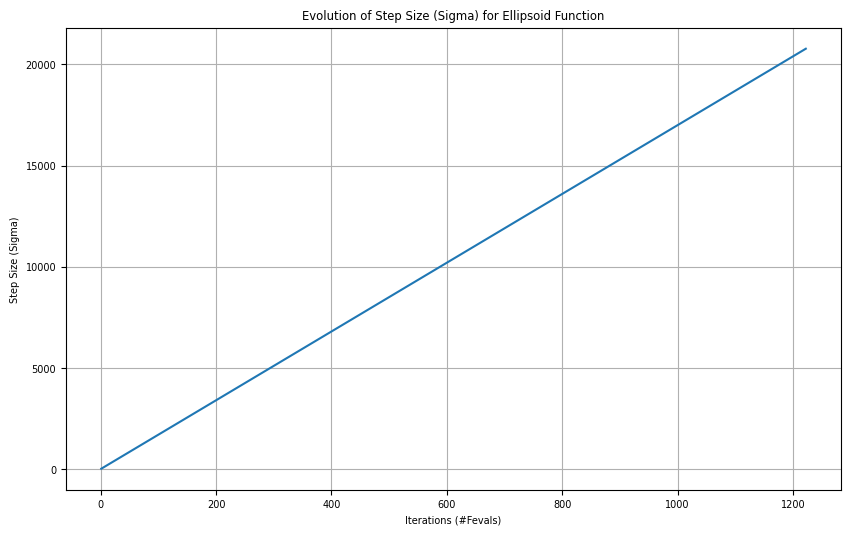

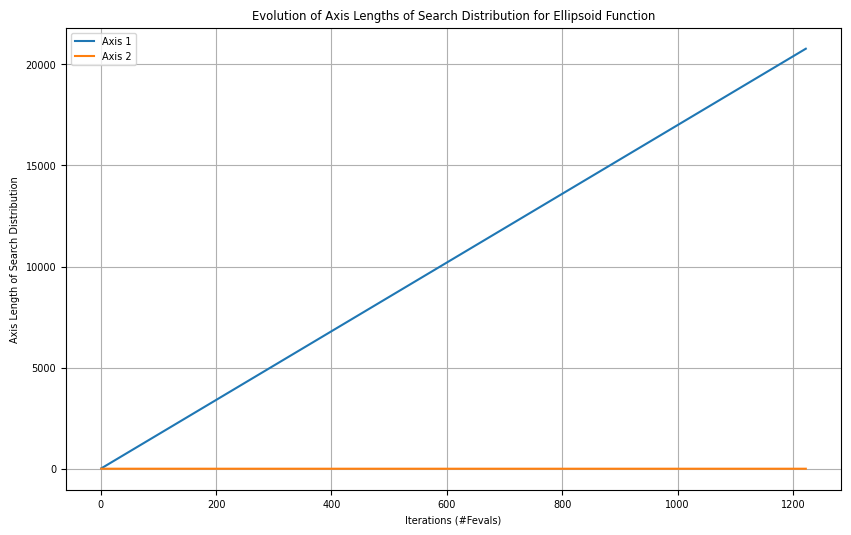

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os

output_directory = 'outcmaes'

if os.path.exists(output_directory):
    # --- Plotting Fitness ---
    try:
        # Skip the header row (first row)
        fit_file = os.path.join(output_directory, 'fit.dat')
        fit_data = np.loadtxt(fit_file, skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(fit_data[:, 0], fit_data[:, 5]) # Column 0 is iteration, Column 5 is best fitness
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Best Fitness Value (log scale)")
        plt.title("Evolution of Best Fitness Value for Ellipsoid Function")
        plt.yscale('log') # Set y-axis to logarithmic scale
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print(f"File {fit_file} not found.")

    # --- Plotting Standard Deviation (Sigma) ---
    try:
        # Skip the header row (first row)
        stddev_file = os.path.join(output_directory, 'stddev.dat')
        stddev_data = np.loadtxt(stddev_file, skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(stddev_data[:, 0], stddev_data[:, 1]) # Column 0 is iteration, Column 1 is sigma
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Step Size (Sigma)")
        plt.title("Evolution of Step Size (Sigma) for Ellipsoid Function")
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print(f"File {stddev_file} not found.")

    # --- Plotting Axis Lengths (optional - shows how the search space is stretched) ---
    try:
        # Skip the header row (first row)
        axlen_file = os.path.join(output_directory, 'axlen.dat')
        axlen_data = np.loadtxt(axlen_file, skiprows=1)
        if axlen_data.shape[1] > 2: # Check if there are at least 2 axis length columns
            plt.figure(figsize=(10, 6))
            plt.plot(axlen_data[:, 0], axlen_data[:, 1], label='Axis 1')
            plt.plot(axlen_data[:, 0], axlen_data[:, 2], label='Axis 2')
            # Add more lines for other axes if needed
            plt.xlabel("Iterations (#Fevals)")
            plt.ylabel("Axis Length of Search Distribution")
            plt.title("Evolution of Axis Lengths of Search Distribution for Ellipsoid Function")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
             print(f"Not enough axis length data in {axlen_file} to plot.")
    except FileNotFoundError:
        print(f"File {axlen_file} not found.")
    except IndexError:
         print(f"Error reading axis length data from {axlen_file}. Ensure file format is correct.")


else:
    print(f"Output directory '{output_directory}' not found. Please run the optimization code first.")

In [31]:
def ellipsoid_function(x):
  """The Ellipsoid function."""
  dimension = len(x)
  weights = 10** (np.arange(dimension) / (dimension - 1))
  return np.sum(weights * x**2)

In [32]:
# --- Initial CMA-ES Settings for Ellipsoid Function ---
# 1. Problem dimension (e.g., we search for a solution in 100-dimensional space)
# Use the same dimension as before for comparison
dimension_ellipsoid = dimension

# 2. Initial point (first guess)
# A vector of zeros is a good starting point for the Ellipsoid function
x0_ellipsoid = np.zeros(dimension_ellipsoid)

# 3. Initial step size (standard deviation)
sigma0_ellipsoid = 0.5 # Starting with the same sigma as Rosenbrock for comparison

# Initialize the CMA-ES evolution strategy for Ellipsoid function
es_ellipsoid = cma.CMAEvolutionStrategy(x0_ellipsoid, sigma0_ellipsoid)

# Run optimization using the simpler 'optimize' method
print("\nStarting optimization for Ellipsoid function...")
es_ellipsoid.optimize(ellipsoid_function)

# --- Display Results for Ellipsoid Function ---
print("\n--- Ellipsoid Optimization Results ---")
best_solution_ellipsoid = es_ellipsoid.result[0]
best_fitness_ellipsoid = es_ellipsoid.result[1]

print(f"Dimension: {dimension_ellipsoid}D")
# The actual optimal solution is [0, 0, ..., 0]
print(f"Optimal solution (x): \n{np.round(best_solution_ellipsoid, 8)}")
# The actual minimum function value is 0
print(f"Optimal function value (f(x)): {best_fitness_ellipsoid:.6e}")
print(f"Iterations needed: {es_ellipsoid.result[3]}")

(8_w,17)-aCMA-ES (mu_w=5.1,w_1=31%) in dimension 100 (seed=906698, Thu Sep 25 07:56:07 2025)

Starting optimization for Ellipsoid function...
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     17 6.158164968627935e+01 1.0e+00 4.80e-01  5e-01  5e-01 0:00.0
    2     34 8.058927634811955e+01 1.0e+00 4.64e-01  5e-01  5e-01 0:00.0
    3     51 8.907339248397848e+01 1.0e+00 4.50e-01  4e-01  5e-01 0:00.0
  100   1700 6.679148201830828e+00 1.2e+00 8.85e-02  9e-02  9e-02 0:00.4
  200   3400 3.078199539105647e-01 1.2e+00 1.90e-02  2e-02  2e-02 0:00.8
  300   5100 2.015437997887635e-02 1.3e+00 4.98e-03  5e-03  5e-03 0:01.2
  400   6800 9.994253719422012e-04 1.3e+00 1.04e-03  1e-03  1e-03 0:01.7
  500   8500 5.045616603305041e-05 1.3e+00 2.67e-04  2e-04  3e-04 0:02.1
  600  10200 3.574522193581698e-06 1.4e+00 7.03e-05  6e-05  7e-05 0:02.5
  700  11900 2.116837851509816e-07 1.4e+00 1.73e-05  2e-05  2e-05 0:03.0
  800  13600 1.186108659011587e-08 1.5e+00 4.03e-06  3e-

In [24]:
import os

output_directory = 'outcmaes'
fit_file = os.path.join(output_directory, 'fit.dat')

if os.path.exists(fit_file):
    with open(fit_file, 'r') as f:
        for i in range(10): # Read the first 10 lines
            line = f.readline()
            if not line:
                break
            print(line.strip())
else:
    print(f"File '{fit_file}' not found.")

% # columns="iteration, evaluation, sigma, axis ratio, bestever, best, median, worst objective function value, interquartile range, 25%tile, current best feasible f-value, further/more values", seed=837155, Thu Sep 25 07:44:46 2025, <python>{}</python>
1 17 0.480537922130667 1.0000495012251451 2825.4416956060536 2.8254416956060536e+03 4520.8683326418195 6734.106719650998 1269.5114411004797 3688.119693220111 nan
2 34 0.4638946109650628 1.0000495012251451 2825.4416956060536 2.9968969076152421e+03 4630.492897398018 6101.500423821589 1582.0862100326085 3901.79896317768 nan
3 51 0.4496196660123294 1.0206434069870332 2825.4416956060536 3.7784871184324729e+03 4781.243482700148 6572.006994249542 1675.0764077552558 4235.067647377706 nan
4 68 0.43548930942039626 1.0206434069870332 2564.825876373968 2.5648258763739682e+03 5126.443144414628 8905.790315607042 1665.1452324852598 4662.417946758302 nan
5 85 0.42283621332072 1.025678295896892 2564.825876373968 3.3237309358545826e+03 4827.726274173682 6

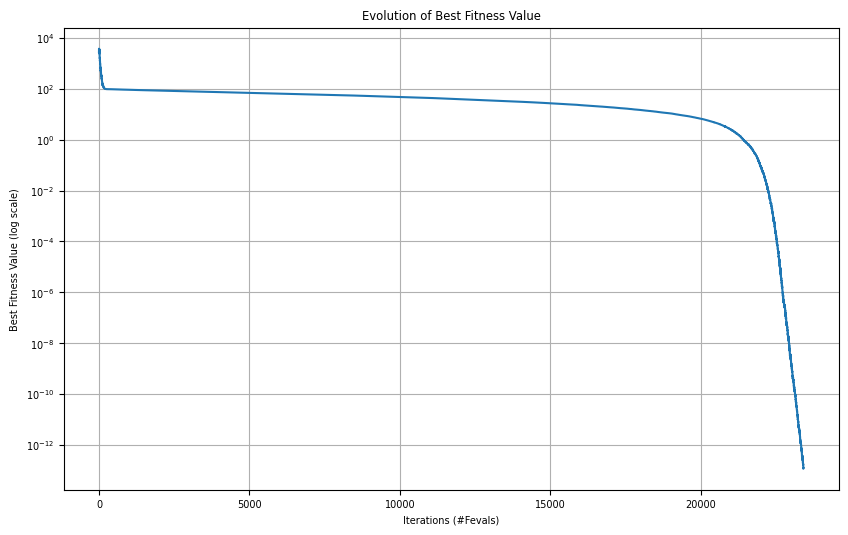

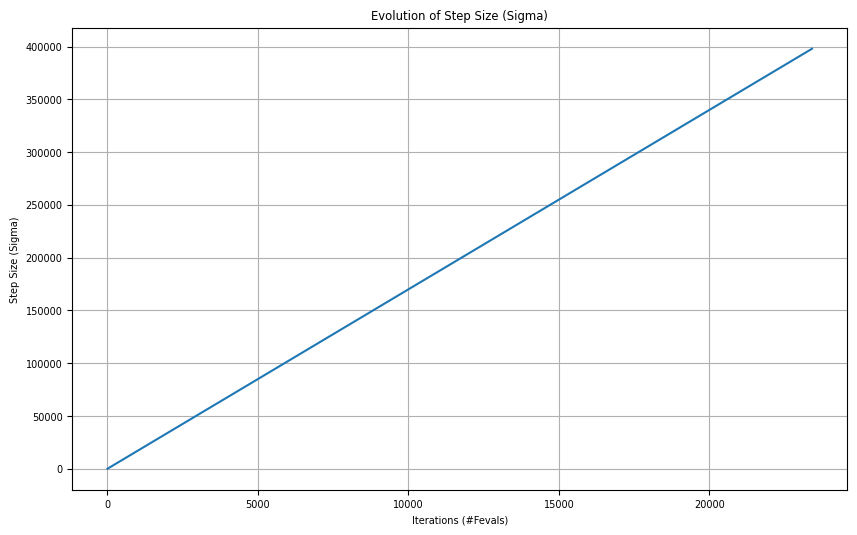

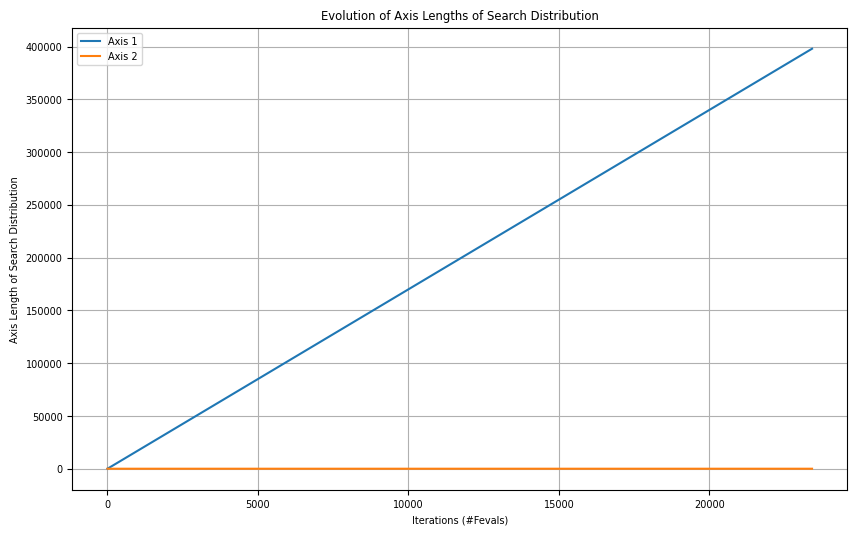

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

output_directory = 'outcmaes'

if os.path.exists(output_directory):
    # --- Plotting Fitness ---
    try:
        # Skip the header row (first row)
        fit_data = np.loadtxt(os.path.join(output_directory, 'fit.dat'), skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(fit_data[:, 0], fit_data[:, 5]) # Column 0 is iteration, Column 5 is best fitness
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Best Fitness Value (log scale)")
        plt.title("Evolution of Best Fitness Value")
        plt.yscale('log') # Set y-axis to logarithmic scale
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print("File fit.dat not found.")

    # --- Plotting Standard Deviation (Sigma) ---
    try:
        # Skip the header row (first row)
        stddev_data = np.loadtxt(os.path.join(output_directory, 'stddev.dat'), skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(stddev_data[:, 0], stddev_data[:, 1]) # Column 0 is iteration, Column 1 is sigma
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Step Size (Sigma)")
        plt.title("Evolution of Step Size (Sigma)")
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print("File stddev.dat not found.")

    # --- Plotting Axis Lengths (optional - shows how the search space is stretched) ---
    # You might need to inspect axlen.dat or axlenprec.dat to pick the right columns
    # This is a basic example plotting the first two axis lengths if available
    try:
        # Skip the header row (first row)
        axlen_data = np.loadtxt(os.path.join(output_directory, 'axlen.dat'), skiprows=1)
        if axlen_data.shape[1] > 2: # Check if there are at least 2 axis length columns
            plt.figure(figsize=(10, 6))
            plt.plot(axlen_data[:, 0], axlen_data[:, 1], label='Axis 1')
            plt.plot(axlen_data[:, 0], axlen_data[:, 2], label='Axis 2')
            # Add more lines for other axes if needed
            plt.xlabel("Iterations (#Fevals)")
            plt.ylabel("Axis Length of Search Distribution")
            plt.title("Evolution of Axis Lengths of Search Distribution")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
             print("Not enough axis length data to plot.")
    except FileNotFoundError:
        print("File axlen.dat not found.")
    except IndexError:
         print("Error reading axis length data. Ensure file format is correct.")


else:
    print(f"Output directory '{output_directory}' not found. Please run the optimization code first.")

In [27]:
def ellipsoid_function(x):
  """The Ellipsoid function."""
  dimension = len(x)
  weights = 10** (np.arange(dimension) / (dimension - 1))
  return np.sum(weights * x**2)

In [28]:
# --- Initial CMA-ES Settings for Ellipsoid Function ---
# 1. Problem dimension (e.g., we search for a solution in 100-dimensional space)
# Use the same dimension as before for comparison
dimension_ellipsoid = dimension

# 2. Initial point (first guess)
# A vector of zeros is a good starting point for the Ellipsoid function
x0_ellipsoid = np.zeros(dimension_ellipsoid)

# 3. Initial step size (standard deviation)
sigma0_ellipsoid = 0.5 # Starting with the same sigma as Rosenbrock for comparison

# Initialize the CMA-ES evolution strategy for Ellipsoid function
es_ellipsoid = cma.CMAEvolutionStrategy(x0_ellipsoid, sigma0_ellipsoid)

# Run optimization using the simpler 'optimize' method
print("\nStarting optimization for Ellipsoid function...")
es_ellipsoid.optimize(ellipsoid_function)

# --- Display Results for Ellipsoid Function ---
print("\n--- Ellipsoid Optimization Results ---")
best_solution_ellipsoid = es_ellipsoid.result[0]
best_fitness_ellipsoid = es_ellipsoid.result[1]

print(f"Dimension: {dimension_ellipsoid}D")
# The actual optimal solution is [0, 0, ..., 0]
print(f"Optimal solution (x): \n{np.round(best_solution_ellipsoid, 8)}")
# The actual minimum function value is 0
print(f"Optimal function value (f(x)): {best_fitness_ellipsoid:.6e}")
print(f"Iterations needed: {es_ellipsoid.result[3]}")

(8_w,17)-aCMA-ES (mu_w=5.1,w_1=31%) in dimension 100 (seed=797633, Thu Sep 25 07:51:00 2025)

Starting optimization for Ellipsoid function...
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     17 6.959193020800932e+01 1.0e+00 4.80e-01  5e-01  5e-01 0:00.0
    2     34 8.712403538170302e+01 1.0e+00 4.64e-01  5e-01  5e-01 0:00.0
    3     51 9.620866552802899e+01 1.0e+00 4.50e-01  4e-01  5e-01 0:00.0
  100   1700 5.017002382987341e+00 1.2e+00 7.99e-02  8e-02  8e-02 0:00.9
  200   3400 3.721141849813524e-01 1.3e+00 2.02e-02  2e-02  2e-02 0:01.7
  300   5100 2.204762965940349e-02 1.3e+00 5.01e-03  5e-03  5e-03 0:02.6
  400   6800 1.078573908101584e-03 1.3e+00 1.19e-03  1e-03  1e-03 0:03.4
  500   8500 5.571189775262044e-05 1.4e+00 2.81e-04  3e-04  3e-04 0:03.8
  600  10200 1.979489769570493e-06 1.4e+00 5.57e-05  5e-05  6e-05 0:04.3
  700  11900 1.054150615510625e-07 1.4e+00 1.17e-05  1e-05  1e-05 0:04.7
  800  13600 4.203281188370808e-09 1.4e+00 2.44e-06  2e-

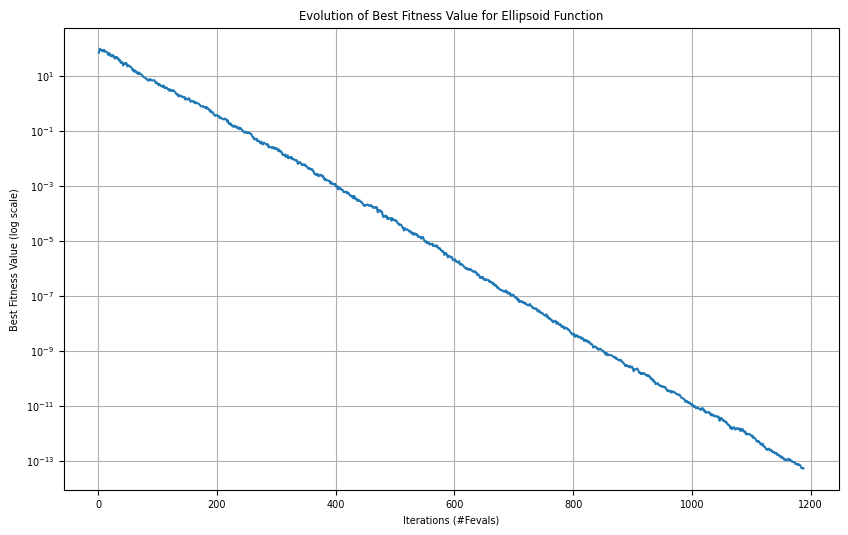

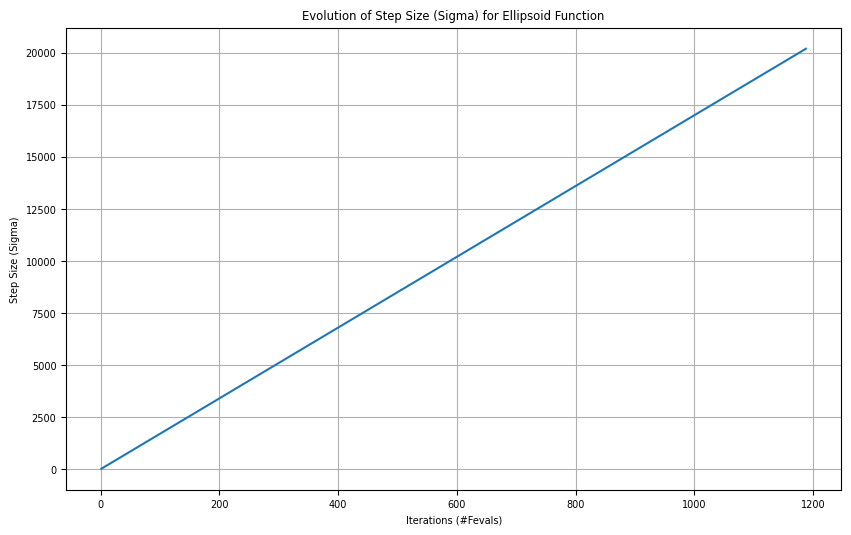

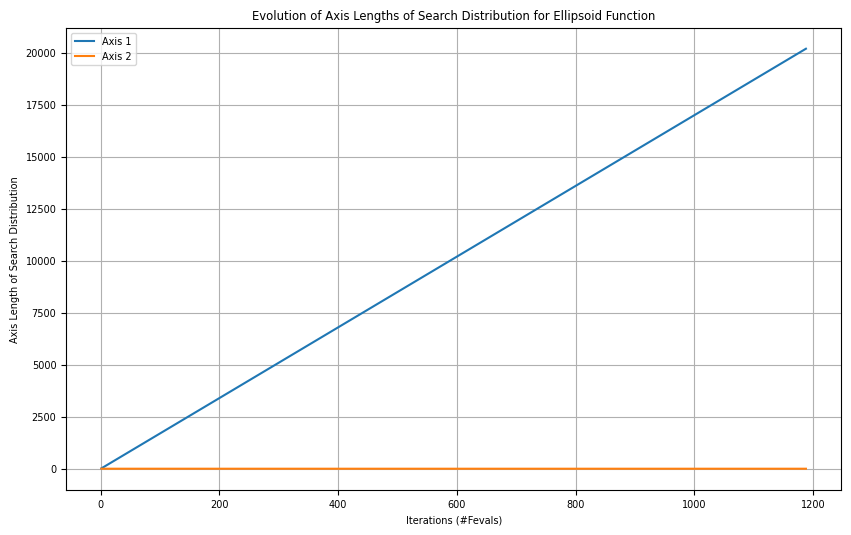

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os

output_directory = 'outcmaes'

if os.path.exists(output_directory):
    # --- Plotting Fitness ---
    try:
        # Skip the header row (first row)
        fit_file = os.path.join(output_directory, 'fit.dat')
        fit_data = np.loadtxt(fit_file, skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(fit_data[:, 0], fit_data[:, 5]) # Column 0 is iteration, Column 5 is best fitness
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Best Fitness Value (log scale)")
        plt.title("Evolution of Best Fitness Value for Ellipsoid Function")
        plt.yscale('log') # Set y-axis to logarithmic scale
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print(f"File {fit_file} not found.")

    # --- Plotting Standard Deviation (Sigma) ---
    try:
        # Skip the header row (first row)
        stddev_file = os.path.join(output_directory, 'stddev.dat')
        stddev_data = np.loadtxt(stddev_file, skiprows=1)
        plt.figure(figsize=(10, 6))
        plt.plot(stddev_data[:, 0], stddev_data[:, 1]) # Column 0 is iteration, Column 1 is sigma
        plt.xlabel("Iterations (#Fevals)")
        plt.ylabel("Step Size (Sigma)")
        plt.title("Evolution of Step Size (Sigma) for Ellipsoid Function")
        plt.grid(True)
        plt.show()
    except FileNotFoundError:
        print(f"File {stddev_file} not found.")

    # --- Plotting Axis Lengths (optional - shows how the search space is stretched) ---
    try:
        # Skip the header row (first row)
        axlen_file = os.path.join(output_directory, 'axlen.dat')
        axlen_data = np.loadtxt(axlen_file, skiprows=1)
        if axlen_data.shape[1] > 2: # Check if there are at least 2 axis length columns
            plt.figure(figsize=(10, 6))
            plt.plot(axlen_data[:, 0], axlen_data[:, 1], label='Axis 1')
            plt.plot(axlen_data[:, 0], axlen_data[:, 2], label='Axis 2')
            # Add more lines for other axes if needed
            plt.xlabel("Iterations (#Fevals)")
            plt.ylabel("Axis Length of Search Distribution")
            plt.title("Evolution of Axis Lengths of Search Distribution for Ellipsoid Function")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
             print(f"Not enough axis length data in {axlen_file} to plot.")
    except FileNotFoundError:
        print(f"File {axlen_file} not found.")
    except IndexError:
         print(f"Error reading axis length data from {axlen_file}. Ensure file format is correct.")


else:
    print(f"Output directory '{output_directory}' not found. Please run the optimization code first.")

In [30]:
# Retrieve results for Rosenbrock
rosenbrock_best_fitness = es.result[1]
rosenbrock_iterations = es.result[3]

# Retrieve results for Ellipsoid
ellipsoid_best_fitness = es_ellipsoid.result[1]
ellipsoid_iterations = es_ellipsoid.result[3]

# Print the results
print("--- Optimization Results Comparison ---")
print(f"Rosenbrock Function:")
print(f"  Best Fitness Value: {rosenbrock_best_fitness:.6e}")
print(f"  Iterations Needed: {rosenbrock_iterations}")
print(f"\nEllipsoid Function:")
print(f"  Best Fitness Value: {ellipsoid_best_fitness:.6e}")
print(f"  Iterations Needed: {ellipsoid_iterations}")

# Analysis and Comparison
print("\n--- Analysis ---")
print("Comparison of Best Fitness Values:")
if ellipsoid_best_fitness < rosenbrock_best_fitness:
    print("  CMA-ES achieved a lower (better) fitness value for the Ellipsoid function.")
elif ellipsoid_best_fitness > rosenbrock_best_fitness:
    print("  CMA-ES achieved a lower (better) fitness value for the Rosenbrock function.")
else:
    print("  CMA-ES achieved the same best fitness value for both functions.")

print("\nComparison of Iterations Needed:")
if ellipsoid_iterations < rosenbrock_iterations:
    print("  CMA-ES required fewer iterations to optimize the Ellipsoid function.")
elif ellipsoid_iterations > rosenbrock_iterations:
    print("  CMA-ES required fewer iterations to optimize the Rosenbrock function.")
else:
    print("  CMA-ES required the same number of iterations for both functions.")

print("\nDiscussion:")
print("The Ellipsoid function is a unimodal and separable function, meaning it has only one minimum and its variables can be optimized independently.")
print("The Rosenbrock function is a multimodal and non-separable function, featuring a narrow, curved valley leading to the minimum, which is difficult for optimization algorithms to navigate.")
print("Based on the results:")
if ellipsoid_best_fitness < rosenbrock_best_fitness and ellipsoid_iterations < rosenbrock_iterations:
    print("  CMA-ES found a better solution and converged much faster on the Ellipsoid function compared to the Rosenbrock function.")
    print("  This is expected because the Ellipsoid function is significantly easier to optimize due to its simpler structure (unimodal, separable).")
elif ellipsoid_best_fitness < rosenbrock_best_fitness:
     print("  CMA-ES found a better solution on the Ellipsoid function but took more iterations than Rosenbrock.")
elif ellipsoid_iterations < rosenbrock_iterations:
     print("  CMA-ES converged faster on the Ellipsoid function but did not find a better solution than Rosenbrock.")
else:
    print("  The optimization performance between the two functions was similar.")


--- Optimization Results Comparison ---
Rosenbrock Function:
  Best Fitness Value: 1.150824e-13
  Iterations Needed: 397936

Ellipsoid Function:
  Best Fitness Value: 5.106228e-14
  Iterations Needed: 20196

--- Analysis ---
Comparison of Best Fitness Values:
  CMA-ES achieved a lower (better) fitness value for the Ellipsoid function.

Comparison of Iterations Needed:
  CMA-ES required fewer iterations to optimize the Ellipsoid function.

Discussion:
The Ellipsoid function is a unimodal and separable function, meaning it has only one minimum and its variables can be optimized independently.
The Rosenbrock function is a multimodal and non-separable function, featuring a narrow, curved valley leading to the minimum, which is difficult for optimization algorithms to navigate.
Based on the results:
  CMA-ES found a better solution and converged much faster on the Ellipsoid function compared to the Rosenbrock function.
  This is expected because the Ellipsoid function is significantly easie